In [1]:
import csv
import datetime
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
file_location = 'C:\\Users\\Tan\\Desktop\\GA\\Capstone\\online_retail.xlsx'

In [3]:
f = pd.read_excel(file_location, sheet_name="Online Retail")

In [4]:
df = pd.DataFrame(f)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [8]:
# Focus on UK customers
df = df[df.Country == "United Kingdom"]

In [9]:
df.drop('Country', axis=1, inplace=True)

In [10]:
df = df[~df['CustomerID'].isnull()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 7 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null datetime64[ns]
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 22.1+ MB


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# Creating gross revenue variable
df['gross'] = df.Quantity * df.UnitPrice

In [14]:
# 7533 negative "Quantity" entries, and some of these items appear to be returns
df[(df.Quantity<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,gross
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,-1.25


In [15]:
# Among these negative "Quantity" observations are 74 observations with "Description" of "Discount"
df[df.Description=='Discount']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,gross
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,-5.76
...,...,...,...,...,...,...,...,...
479867,C577227,D,Discount,-1,2011-11-18 12:06:00,14.88,14527.0,-14.88
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,-19.82
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,-16.76
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,-20.53


In [16]:
df[df.Description=='Manual']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,gross
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,18.95
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,5.04
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,30.60
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,5.00
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,-125.00
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,-9.95
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,1.26


In [17]:
# The returns/discounts are apparently indicated with "InvoiceNo" starting with C

In [18]:
df[(df.Description=='Discount') & (df.Quantity!=-1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,gross
108088,C545478,D,Discount,-720,2011-03-03 11:08:00,0.01,16422.0,-7.2
182729,C552569,D,Discount,-240,2011-05-10 12:06:00,0.03,12901.0,-7.2
183138,C552650,D,Discount,-18,2011-05-10 14:03:00,1.45,16672.0,-26.1
196362,C553841,D,Discount,-48,2011-05-19 12:19:00,0.20,16029.0,-9.6
226396,C556796,D,Discount,-96,2011-06-14 14:40:00,0.70,16013.0,-67.2


In [19]:
df['DateTime'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [20]:
df.drop('InvoiceDate', axis=1, inplace=True)

In [21]:
# Splitting the InvoiceDate variable into "time" and "date" variables
df['time'], df['date'] = df['DateTime'].apply(lambda x: x.time()), df['DateTime'].apply(lambda x:x.date())
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,15.30,2010-12-01 08:26:00,08:26:00,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,20.34,2010-12-01 08:26:00,08:26:00,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,22.00,2010-12-01 08:26:00,08:26:00,2010-12-01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 10 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
gross          361878 non-null float64
DateTime       361878 non-null datetime64[ns]
time           361878 non-null object
date           361878 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [23]:
# There are very large and unusual maximum/minimum "Quantity", "UnitPrice" and "gross" amounts
# So the dataset is not as clean as it might first appear
df.describe()

,Quantity,UnitPrice,CustomerID,gross
count,361878.000000,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368,18.702086
std,263.129266,70.654731,1594.402590,451.918484
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,14194.000000,3.750000
50%,4.000000,1.950000,15514.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,38970.000000,18287.000000,168469.600000


# Data cleaning & outlier search

Conceptually, having merchandise returns in the data is not an issue as I will be calculating the (monthly) net revenue later on, but it means that simply excluding negative revenue transactions from the outset will introduce bias into the data. This is especially important when we get to the statistical inference part of the analysis.

In any event, it is good practice to sift out incorrect transactions, particularly when they result in extreme outliers. So in this section, I scan through unusually large transactions to clean the data.

In [24]:
# The max AND min "Quantity" observations were recorded on the same day! Clearly a mistake in the order for "Little Birdie".
# This customer had only one other (small) transaction.
df[df.CustomerID==16446]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,1.65,16446.0,1.65,2011-05-18 09:52:00,09:52:00,2011-05-18
194355,553573,22982,PANTRY PASTRY BRUSH,1,1.25,16446.0,1.25,2011-05-18 09:52:00,09:52:00,2011-05-18
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60,2011-12-09 09:15:00,09:15:00,2011-12-09
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446.0,-168469.60,2011-12-09 09:27:00,09:27:00,2011-12-09


In [25]:
# Dropping this max/min observation
df.drop(index=[540421, 540422], inplace=True)

In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID,gross
count,361876.000000,361876.000000,361876.000000,361876.000000
mean,11.077090,3.256013,15547.866405,18.702189
std,181.605972,70.654926,1594.405598,217.647915
min,-74215.000000,0.000000,12346.000000,-77183.600000
25%,2.000000,1.250000,14194.000000,3.750000
50%,4.000000,1.950000,15514.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,74215.000000,38970.000000,18287.000000,77183.600000


In [27]:
# There are 244 transactions with gross revenues more than 5 std dev above the mean
rev_outliers = df[df.gross>18.70 + (5*217.65)]
rev_outliers.gross.sort_values(ascending=False).head(20)

61619     77183.60
222680    38970.00
173382     8142.75
348325     7144.72
52711      6539.40
160546     6539.40
52709      4921.50
160542     4632.00
52772      4522.50
244419     4401.00
160544     4254.50
291249     4176.00
52134      4121.64
533812     3861.00
16438      3828.00
348319     3825.36
52710      3700.00
348323     3621.00
160545     3380.00
52771      3315.00
Name: gross, dtype: float64

In [28]:
df[df.gross>4000]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
52134,540689,22470,HEART OF WICKER LARGE,1284,3.21,17450.0,4121.64,2011-01-11 08:43:00,08:43:00,2011-01-11
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.55,15749.0,4921.50,2011-01-11 12:55:00,12:55:00,2011-01-11
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749.0,6539.40,2011-01-11 12:55:00,12:55:00,2011-01-11
52772,540818,48185,DOORMAT FAIRY CAKE,670,6.75,15749.0,4522.50,2011-01-11 12:57:00,12:57:00,2011-01-11
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,77183.60,2011-01-18 10:01:00,10:01:00,2011-01-18
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.40,15749.0,4632.00,2011-04-18 13:20:00,13:20:00,2011-04-18
160544,550461,48185,DOORMAT FAIRY CAKE,670,6.35,15749.0,4254.50,2011-04-18 13:20:00,13:20:00,2011-04-18
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749.0,6539.40,2011-04-18 13:20:00,13:20:00,2011-04-18
173382,551697,POST,POSTAGE,1,8142.75,16029.0,8142.75,2011-05-03 13:46:00,13:46:00,2011-05-03
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,15098.0,38970.00,2011-06-10 15:28:00,15:28:00,2011-06-10


In [29]:
# All transactions dated 18 April 2011 for this customer were reversed on the same day with a lost! 
# Will delete these transactions...
df[df.CustomerID==15749]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.55,15749.0,4921.5,2011-01-11 12:55:00,12:55:00,2011-01-11
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,1.85,15749.0,3700.0,2011-01-11 12:55:00,12:55:00,2011-01-11
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749.0,6539.4,2011-01-11 12:55:00,12:55:00,2011-01-11
52771,540818,47556B,TEA TIME TEA TOWELS,1300,2.55,15749.0,3315.0,2011-01-11 12:57:00,12:57:00,2011-01-11
52772,540818,48185,DOORMAT FAIRY CAKE,670,6.75,15749.0,4522.5,2011-01-11 12:57:00,12:57:00,2011-01-11
160141,C550456,48185,DOORMAT FAIRY CAKE,-670,6.75,15749.0,-4522.5,2011-04-18 13:08:00,13:08:00,2011-04-18
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2.55,15749.0,-3315.0,2011-04-18 13:08:00,13:08:00,2011-04-18
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2.55,15749.0,-4921.5,2011-04-18 13:08:00,13:08:00,2011-04-18
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,1.85,15749.0,-3700.0,2011-04-18 13:08:00,13:08:00,2011-04-18
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2.10,15749.0,-6539.4,2011-04-18 13:08:00,13:08:00,2011-04-18


In [30]:
df.drop(index=[160141, 160142, 160143, 160144, 160145, 160542, 160543, 160544, 160545, 160546], inplace=True)

In [31]:
# Seems fine
df[df.CustomerID==15749]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.55,15749.0,4921.5,2011-01-11 12:55:00,12:55:00,2011-01-11
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,1.85,15749.0,3700.0,2011-01-11 12:55:00,12:55:00,2011-01-11
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749.0,6539.4,2011-01-11 12:55:00,12:55:00,2011-01-11
52771,540818,47556B,TEA TIME TEA TOWELS,1300,2.55,15749.0,3315.0,2011-01-11 12:57:00,12:57:00,2011-01-11
52772,540818,48185,DOORMAT FAIRY CAKE,670,6.75,15749.0,4522.5,2011-01-11 12:57:00,12:57:00,2011-01-11


In [32]:
# This is the second largest "Quantity" in the dataset, and appears to be another mistake that was quickly reversed
df[df.CustomerID==12346]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,77183.6,2011-01-18 10:01:00,10:01:00,2011-01-18
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1.04,12346.0,-77183.6,2011-01-18 10:17:00,10:17:00,2011-01-18


In [33]:
df = df[df.CustomerID != 12346]

In [34]:
# Seems fine
df[df.CustomerID==17450]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
14059,537448,21756,BATH BUILDING BLOCK WORD,6,6.60,17450.0,39.60,2010-12-07 09:23:00,09:23:00,2010-12-07
14067,537456,22469,HEART OF WICKER SMALL,402,1.93,17450.0,775.86,2010-12-07 09:43:00,09:43:00,2010-12-07
14068,537456,22470,HEART OF WICKER LARGE,378,3.21,17450.0,1213.38,2010-12-07 09:43:00,09:43:00,2010-12-07
52131,540689,21733,RED HANGING HEART T-LIGHT HOLDER,860,3.24,17450.0,2786.40,2011-01-11 08:43:00,08:43:00,2011-01-11
52132,540689,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1010,3.24,17450.0,3272.40,2011-01-11 08:43:00,08:43:00,2011-01-11
...,...,...,...,...,...,...,...,...,...,...
517563,580063,82583,HOT BATHS METAL SIGN,96,2.39,17450.0,229.44,2011-12-01 13:29:00,13:29:00,2011-12-01
517564,580063,82600,N0 SINGING METAL SIGN,96,2.39,17450.0,229.44,2011-12-01 13:29:00,13:29:00,2011-12-01
517565,580063,21174,POTTERING IN THE SHED METAL SIGN,144,2.39,17450.0,344.16,2011-12-01 13:29:00,13:29:00,2011-12-01
517566,580063,21166,COOK WITH WINE METAL SIGN,288,2.39,17450.0,688.32,2011-12-01 13:29:00,13:29:00,2011-12-01


In [35]:
# The transaction with the third largest "UnitPrice" in the dataset on 3 May 2011 stands out sorely!
df[(df.CustomerID==16029) & (df.gross > 1000)]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94,16029.0,2256.00,2010-12-16 10:35:00,10:35:00,2010-12-16
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94,16029.0,2256.00,2011-02-11 11:22:00,11:22:00,2011-02-11
173382,551697,POST,POSTAGE,1,8142.75,16029.0,8142.75,2011-05-03 13:46:00,13:46:00,2011-05-03
304105,563563,22273,FELTCRAFT DOLL MOLLY,480,2.55,16029.0,1224.00,2011-08-17 14:03:00,14:03:00,2011-08-17
383960,570094,20971,PINK BLUE FELT CRAFT TRINKET BOX,1296,1.06,16029.0,1373.76,2011-10-07 11:56:00,11:56:00,2011-10-07
383962,570094,22273,FELTCRAFT DOLL MOLLY,720,2.55,16029.0,1836.00,2011-10-07 11:56:00,11:56:00,2011-10-07
384006,570097,22149,FELTCRAFT 6 FLOWER FRIENDS,600,1.85,16029.0,1110.00,2011-10-07 12:05:00,12:05:00,2011-10-07
384007,570097,22147,FELTCRAFT BUTTERFLY HEARTS,840,1.25,16029.0,1050.00,2011-10-07 12:05:00,12:05:00,2011-10-07
384010,570097,20971,PINK BLUE FELT CRAFT TRINKET BOX,1296,1.06,16029.0,1373.76,2011-10-07 12:05:00,12:05:00,2011-10-07
384013,570097,22273,FELTCRAFT DOLL MOLLY,720,2.30,16029.0,1656.00,2011-10-07 12:05:00,12:05:00,2011-10-07


In [36]:
# Looks like another mistake, and these two transactions need to be deleted
df[(df.CustomerID==16029) & (df.StockCode=='POST')]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
173277,C551685,POST,POSTAGE,-1,8142.75,16029.0,-8142.75,2011-05-03 12:51:00,12:51:00,2011-05-03
173382,551697,POST,POSTAGE,1,8142.75,16029.0,8142.75,2011-05-03 13:46:00,13:46:00,2011-05-03


In [37]:
df.drop(index=[173277, 173382], inplace=True)

In [38]:
# Looks like some mistakes in the transactions recorded for this customer. Will delete to only show one transaction
df[df.CustomerID==15098]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,4.95,15098.0,297.0,2011-06-10 15:22:00,15:22:00,2011-06-10
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,15098.0,38970.0,2011-06-10 15:28:00,15:28:00,2011-06-10
222681,C556445,M,Manual,-1,38970.00,15098.0,-38970.0,2011-06-10 15:31:00,15:31:00,2011-06-10
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,649.50,15098.0,649.5,2011-06-10 15:33:00,15:33:00,2011-06-10
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,4.95,15098.0,-297.0,2011-06-10 15:39:00,15:39:00,2011-06-10


In [39]:
# Use at[index#, 'column'] to reset the values of the first transaction
df.at[222670, 'gross'] = 649.50
df.at[222670, 'UnitPrice'] = 10.825

In [40]:
# Dropping the other transactions
df.drop(index=[222680, 222681, 222682, 222692], inplace=True)

In [41]:
df[df.CustomerID==15098]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,10.825,15098.0,649.5,2011-06-10 15:22:00,15:22:00,2011-06-10


In [42]:
# Seems fine
df[df.CustomerID==17949].sort_values('gross', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
244419,558526,23173,REGENCY TEAPOT ROSES,540,8.15,17949.0,4401.00,2011-06-30 11:01:00,11:01:00,2011-06-30
282266,561633,23173,REGENCY TEAPOT ROSES,384,8.15,17949.0,3129.60,2011-07-28 14:33:00,14:33:00,2011-07-28
244420,558526,23174,REGENCY SUGAR BOWL GREEN,696,3.75,17949.0,2610.00,2011-06-30 11:01:00,11:01:00,2011-06-30
369673,569084,22941,CHRISTMAS LIGHTS 10 REINDEER,384,6.50,17949.0,2496.00,2011-09-30 11:56:00,11:56:00,2011-09-30
244800,558554,23245,SET OF 3 REGENCY CAKE TINS,576,4.15,17949.0,2390.40,2011-06-30 12:50:00,12:50:00,2011-06-30
...,...,...,...,...,...,...,...,...,...,...
304431,C563577,21871,SAVE THE PLANET MUG,-576,1.06,17949.0,-610.56,2011-08-17 15:06:00,15:06:00,2011-08-17
304432,C563577,21069,VINTAGE BILLBOARD TEA MUG,-701,1.06,17949.0,-743.06,2011-08-17 15:06:00,15:06:00,2011-08-17
244799,C558553,23170,REGENCY TEA PLATE ROSES,-576,1.45,17949.0,-835.20,2011-06-30 12:44:00,12:44:00,2011-06-30
304430,C563577,21877,HOME SWEET HOME MUG,-828,1.06,17949.0,-877.68,2011-08-17 15:06:00,15:06:00,2011-08-17


In [43]:
# Seems fine
df[df.CustomerID==12931].sort_values('gross', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,1.45,12931.0,4176.00,2011-08-04 18:06:00,18:06:00,2011-08-04
291244,562439,22191,IVORY DINER WALL CLOCK,348,7.65,12931.0,2662.20,2011-08-04 18:06:00,18:06:00,2011-08-04
452365,575335,84879,ASSORTED COLOUR BIRD ORNAMENT,1200,1.45,12931.0,1740.00,2011-11-09 13:56:00,13:56:00,2011-11-09
298951,563074,84879,ASSORTED COLOUR BIRD ORNAMENT,968,1.45,12931.0,1403.60,2011-08-11 15:58:00,15:58:00,2011-08-11
291247,562439,22197,POPCORN HOLDER,1900,0.72,12931.0,1368.00,2011-08-04 18:06:00,18:06:00,2011-08-04
...,...,...,...,...,...,...,...,...,...,...
452552,C575341,22991,GIRAFFE WOODEN RULER,-288,1.65,12931.0,-475.20,2011-11-09 14:36:00,14:36:00,2011-11-09
320582,C565044,21479,WHITE SKULL HOT WATER BOTTLE,-144,3.39,12931.0,-488.16,2011-08-31 17:02:00,17:02:00,2011-08-31
319915,C564940,22992,REVOLVER WOODEN RULER,-400,1.65,12931.0,-660.00,2011-08-31 13:10:00,13:10:00,2011-08-31
319916,C564940,22991,GIRAFFE WOODEN RULER,-400,1.65,12931.0,-660.00,2011-08-31 13:10:00,13:10:00,2011-08-31


In [44]:
# Seems fine (last customer on the list of gross > 4000)
df[df.CustomerID==17450].sort_values('gross', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.06,17450.0,7144.72,2011-09-20 11:05:00,11:05:00,2011-09-20
52134,540689,22470,HEART OF WICKER LARGE,1284,3.21,17450.0,4121.64,2011-01-11 08:43:00,08:43:00,2011-01-11
348319,567423,23113,PANTRY CHOPPING BOARD,756,5.06,17450.0,3825.36,2011-09-20 11:05:00,11:05:00,2011-09-20
348323,567423,22722,SET OF 6 SPICE TINS PANTRY DESIGN,852,4.25,17450.0,3621.00,2011-09-20 11:05:00,11:05:00,2011-09-20
52132,540689,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1010,3.24,17450.0,3272.40,2011-01-11 08:43:00,08:43:00,2011-01-11
...,...,...,...,...,...,...,...,...,...,...
322132,C565229,POST,POSTAGE,-1,200.00,17450.0,-200.00,2011-09-02 09:12:00,09:12:00,2011-09-02
235379,C557638,POST,POSTAGE,-1,545.58,17450.0,-545.58,2011-06-21 16:01:00,16:01:00,2011-06-21
88210,C543789,M,Manual,-1,856.48,17450.0,-856.48,2011-02-11 17:10:00,17:10:00,2011-02-11
367063,C568832,23113,PANTRY CHOPPING BOARD,-186,5.15,17450.0,-957.90,2011-09-29 11:35:00,11:35:00,2011-09-29


In [45]:
# So after all that...
df.describe()

,Quantity,UnitPrice,CustomerID,gross
count,361858.000000,361858.000000,361858.000000,361858.000000
mean,11.077641,3.099799,15547.880857,18.707161
std,49.315358,20.681092,1594.426031,71.388585
min,-9360.000000,0.000000,12747.000000,-6930.000000
25%,2.000000,1.250000,14194.000000,3.750000
50%,4.000000,1.950000,15514.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,12540.000000,6930.000000,18287.000000,7144.720000


### Check the remaining large negative transactions

In [46]:
df[df.gross<0].sort_values('gross').head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
173391,C551699,M,Manual,-1,6930.00,16029.0,-6930.00,2011-05-03 14:12:00,14:12:00,2011-05-03
268027,C560372,M,Manual,-1,4287.63,17448.0,-4287.63,2011-07-18 12:26:00,12:26:00,2011-07-18
349750,C567527,23113,PANTRY CHOPPING BOARD,-756,5.06,17450.0,-3825.36,2011-09-21 09:16:00,09:16:00,2011-09-21
293842,C562647,M,Manual,-1,3155.95,15502.0,-3155.95,2011-08-08 12:56:00,12:56:00,2011-08-08
271151,C560647,M,Manual,-1,3060.60,18102.0,-3060.60,2011-07-20 11:31:00,11:31:00,2011-07-20
320580,C565044,22191,IVORY DINER WALL CLOCK,-318,7.65,12931.0,-2432.70,2011-08-31 17:02:00,17:02:00,2011-08-31
150591,C549452,D,Discount,-1,1867.86,17940.0,-1867.86,2011-04-08 14:17:00,14:17:00,2011-04-08
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2.55,16029.0,-1836.00,2011-10-11 11:10:00,11:10:00,2011-10-11
342996,C566925,M,Manual,-1,1829.84,12748.0,-1829.84,2011-09-15 15:18:00,15:18:00,2011-09-15
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2.30,16029.0,-1656.00,2011-10-11 11:10:00,11:10:00,2011-10-11


In [47]:
# Customer looks like a frequent one, but the large negative transaction on 3 May 2011 really stands out...
# there is also little information about the transaction, except for the "Manual" entry
df[df.CustomerID==16029].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
173391,C551699,M,Manual,-1,6930.00,16029.0,-6930.00,2011-05-03 14:12:00,14:12:00,2011-05-03
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2.55,16029.0,-1836.00,2011-10-11 11:10:00,11:10:00,2011-10-11
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2.30,16029.0,-1656.00,2011-10-11 11:10:00,11:10:00,2011-10-11
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,1.06,16029.0,-1373.76,2011-10-11 11:10:00,11:10:00,2011-10-11
390548,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,1.06,16029.0,-1373.76,2011-10-11 11:10:00,11:10:00,2011-10-11
...,...,...,...,...,...,...,...,...,...,...
384013,570097,22273,FELTCRAFT DOLL MOLLY,720,2.30,16029.0,1656.00,2011-10-07 12:05:00,12:05:00,2011-10-07
390557,570557,22273,FELTCRAFT DOLL MOLLY,720,2.55,16029.0,1836.00,2011-10-11 11:15:00,11:15:00,2011-10-11
383962,570094,22273,FELTCRAFT DOLL MOLLY,720,2.55,16029.0,1836.00,2011-10-07 11:56:00,11:56:00,2011-10-07
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94,16029.0,2256.00,2010-12-16 10:35:00,10:35:00,2010-12-16


In [48]:
df.drop(index=[173391], inplace=True)

In [49]:
# But this one looks very unusual with one single large negative transaction, will delete
df[df.CustomerID==17448]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
268027,C560372,M,Manual,-1,4287.63,17448.0,-4287.63,2011-07-18 12:26:00,12:26:00,2011-07-18


In [50]:
df = df[df.CustomerID!=17448]

In [51]:
# Very unusual and exact offsetting amounts of the largest positive and negative "gross", simply recorded as "Manual"
# Will delete these two transactions
df[df.CustomerID==15502].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
293842,C562647,M,Manual,-1,3155.95,15502.0,-3155.95,2011-08-08 12:56:00,12:56:00,2011-08-08
446819,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-67,8.50,15502.0,-569.50,2011-11-07 16:39:00,16:39:00,2011-11-07
374637,C569390,M,Manual,-1,152.78,15502.0,-152.78,2011-10-03 16:53:00,16:53:00,2011-10-03
374639,C569390,M,Manual,-1,120.00,15502.0,-120.00,2011-10-03 16:53:00,16:53:00,2011-10-03
446818,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-8,8.50,15502.0,-68.00,2011-11-07 16:39:00,16:39:00,2011-11-07
...,...,...,...,...,...,...,...,...,...,...
293598,562608,22423,REGENCY CAKESTAND 3 TIER,16,10.95,15502.0,175.20,2011-08-08 11:45:00,11:45:00,2011-08-08
293652,562608,75049L,LARGE CIRCULAR MIRROR MOBILE,384,0.85,15502.0,326.40,2011-08-08 11:45:00,11:45:00,2011-08-08
114946,546096,75049L,LARGE CIRCULAR MIRROR MOBILE,384,0.85,15502.0,326.40,2011-03-09 11:59:00,11:59:00,2011-03-09
293663,562608,22635,CHILDS BREAKFAST SET DOLLY GIRL,83,8.50,15502.0,705.50,2011-08-08 11:45:00,11:45:00,2011-08-08


In [52]:
df.drop(index=[293842, 374542], inplace=True)

In [53]:
df[df.CustomerID==18102].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
271151,C560647,M,Manual,-1,3060.60,18102.0,-3060.60,2011-07-20 11:31:00,11:31:00,2011-07-20
163041,C550529,M,Manual,-1,158.21,18102.0,-158.21,2011-04-19 10:49:00,10:49:00,2011-04-19
439226,574383,23404,HOME SWEET HOME BLACKBOARD,1,3.26,18102.0,3.26,2011-11-04 11:03:00,11:03:00,2011-11-04
439228,574383,22188,BLACK HEART CARD HOLDER,2,2.31,18102.0,4.62,2011-11-04 11:03:00,11:03:00,2011-11-04
439225,574383,82484,WOOD BLACK BOARD ANT WHITE FINISH,1,4.80,18102.0,4.80,2011-11-04 11:03:00,11:03:00,2011-11-04
...,...,...,...,...,...,...,...,...,...,...
411234,572209,23553,LANDMARK FRAME CAMDEN TOWN,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21
411229,572209,23556,LANDMARK FRAME COVENT GARDEN,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21
411235,572209,23557,LANDMARK FRAME BAKER STREET,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21
411230,572209,23554,LANDMARK FRAME OXFORD STREET,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21


In [54]:
# Looks like a large regular customer
df[df.CustomerID==18102].sum()

Quantity        64122.00
UnitPrice        5159.73
CustomerID    7838166.00
gross          256438.49
dtype: float64

In [55]:
#df.drop(index=[170017, 170018, 170019, 170020, 170021, 170022, 170023, 170024, 170025, 170026, 170027, 
#               170028, 170029, 170030, 170031], inplace=True)

In [56]:
df[df.CustomerID==12931].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
320580,C565044,22191,IVORY DINER WALL CLOCK,-318,7.65,12931.0,-2432.70,2011-08-31 17:02:00,17:02:00,2011-08-31
319916,C564940,22991,GIRAFFE WOODEN RULER,-400,1.65,12931.0,-660.00,2011-08-31 13:10:00,13:10:00,2011-08-31
319915,C564940,22992,REVOLVER WOODEN RULER,-400,1.65,12931.0,-660.00,2011-08-31 13:10:00,13:10:00,2011-08-31
320582,C565044,21479,WHITE SKULL HOT WATER BOTTLE,-144,3.39,12931.0,-488.16,2011-08-31 17:02:00,17:02:00,2011-08-31
452552,C575341,22991,GIRAFFE WOODEN RULER,-288,1.65,12931.0,-475.20,2011-11-09 14:36:00,14:36:00,2011-11-09
...,...,...,...,...,...,...,...,...,...,...
291247,562439,22197,POPCORN HOLDER,1900,0.72,12931.0,1368.00,2011-08-04 18:06:00,18:06:00,2011-08-04
298951,563074,84879,ASSORTED COLOUR BIRD ORNAMENT,968,1.45,12931.0,1403.60,2011-08-11 15:58:00,15:58:00,2011-08-11
452365,575335,84879,ASSORTED COLOUR BIRD ORNAMENT,1200,1.45,12931.0,1740.00,2011-11-09 13:56:00,13:56:00,2011-11-09
291244,562439,22191,IVORY DINER WALL CLOCK,348,7.65,12931.0,2662.20,2011-08-04 18:06:00,18:06:00,2011-08-04


In [57]:
# Plausible, looks like a large regular customer
df[df.CustomerID==12931].sum()

Quantity        23377.00
UnitPrice         175.53
CustomerID    1318962.00
gross           33462.81
dtype: float64

In [58]:
# Will delete the two huge offsetting transactions on 8 April 2011. Obvious mistake here.
df[df.CustomerID==17940]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
86501,543549,22616,PACK OF 12 LONDON TISSUES,432,0.22,17940.0,95.04,2011-02-10 09:29:00,09:29:00,2011-02-10
86502,543549,21981,PACK OF 12 WOODLAND TISSUES,432,0.22,17940.0,95.04,2011-02-10 09:29:00,09:29:00,2011-02-10
86503,543549,21982,PACK OF 12 SUKI TISSUES,1296,0.22,17940.0,285.12,2011-02-10 09:29:00,09:29:00,2011-02-10
86504,543549,21986,PACK OF 12 PINK POLKADOT TISSUES,1296,0.22,17940.0,285.12,2011-02-10 09:29:00,09:29:00,2011-02-10
86505,543549,21985,PACK OF 12 HEARTS DESIGN TISSUES,1296,0.22,17940.0,285.12,2011-02-10 09:29:00,09:29:00,2011-02-10
113120,545911,21981,PACK OF 12 WOODLAND TISSUES,432,0.21,17940.0,90.72,2011-03-08 10:12:00,10:12:00,2011-03-08
113121,545911,22616,PACK OF 12 LONDON TISSUES,432,0.21,17940.0,90.72,2011-03-08 10:12:00,10:12:00,2011-03-08
145811,548910,21982,PACK OF 12 SUKI TISSUES,432,0.20,17940.0,86.40,2011-04-05 08:51:00,08:51:00,2011-04-05
145812,548910,22616,PACK OF 12 LONDON TISSUES,432,0.20,17940.0,86.40,2011-04-05 08:51:00,08:51:00,2011-04-05
145813,548910,21982,PACK OF 12 SUKI TISSUES,432,0.20,17940.0,86.40,2011-04-05 08:51:00,08:51:00,2011-04-05


In [59]:
df.drop(index=[150591, 150615], inplace=True)

In [60]:
df[df.CustomerID==12748].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
342996,C566925,M,Manual,-1,1829.84,12748.0,-1829.84,2011-09-15 15:18:00,15:18:00,2011-09-15
424470,C573268,M,Manual,-1,907.00,12748.0,-907.00,2011-10-28 12:50:00,12:50:00,2011-10-28
473395,C576831,21843,RED RETROSPOT CAKE STAND,-132,4.00,12748.0,-528.00,2011-11-16 14:56:00,14:56:00,2011-11-16
288593,C562188,85099B,JUMBO BAG RED RETROSPOT,-100,1.79,12748.0,-179.00,2011-08-03 12:16:00,12:16:00,2011-08-03
473391,C576831,23056,FLOWERS CHANDELIER T-LIGHT HOLDER,-144,1.00,12748.0,-144.00,2011-11-16 14:56:00,14:56:00,2011-11-16
...,...,...,...,...,...,...,...,...,...,...
370031,569123,90149,SILVER FLOWR PINK SHELL NECKLACE,48,6.36,12748.0,305.28,2011-09-30 13:09:00,13:09:00,2011-09-30
370032,569123,90154,LAZER CUT NECKLACE W PASTEL BEADS,52,7.25,12748.0,377.00,2011-09-30 13:09:00,13:09:00,2011-09-30
171468,551419,M,Manual,1,400.00,12748.0,400.00,2011-04-28 13:51:00,13:51:00,2011-04-28
471156,576623,21843,RED RETROSPOT CAKE STAND,132,4.00,12748.0,528.00,2011-11-15 17:12:00,17:12:00,2011-11-15


In [61]:
# Plausible, a very regular customer who was active throughout the entire period of the dataset
df[df.CustomerID==12748].sum()

Quantity         24210.0
UnitPrice        15115.6
CustomerID    59176216.0
gross            29072.1
dtype: float64

In [62]:
df.describe()

,Quantity,UnitPrice,CustomerID,gross
count,361852.000000,361852.000000,361852.000000,361852.000000
mean,11.077830,3.041082,15547.861308,18.738472
std,49.315745,13.046703,1594.425998,69.551341
min,-9360.000000,0.000000,12747.000000,-3825.360000
25%,2.000000,1.250000,14194.000000,3.750000
50%,4.000000,1.950000,15514.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,12540.000000,3060.600000,18287.000000,7144.720000


### Now, turning to large "Quantity" & "UnitPrice" transactions

In [63]:
# The large quantities recorded look fine in terms of their low unit prices
df[df.Quantity<-500]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,0.03,15838.0,-280.80,2010-12-02 14:23:00,14:23:00,2010-12-02
77073,C542693,15036,ASSORTED COLOURS SILK FAN,-600,0.65,12908.0,-390.00,2011-01-31 12:36:00,12:36:00,2011-01-31
108088,C545478,D,Discount,-720,0.01,16422.0,-7.20,2011-03-03 11:08:00,11:08:00,2011-03-03
182728,C552568,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,-960,0.21,12901.0,-201.60,2011-05-10 12:04:00,12:04:00,2011-05-10
187609,C552995,M,Manual,-1350,0.16,18133.0,-216.00,2011-05-12 15:19:00,15:19:00,2011-05-12
224419,C556522,22920,HERB MARKER BASIL,-1515,0.55,16938.0,-833.25,2011-06-13 11:21:00,11:21:00,2011-06-13
244799,C558553,23170,REGENCY TEA PLATE ROSES,-576,1.45,17949.0,-835.20,2011-06-30 12:44:00,12:44:00,2011-06-30
304430,C563577,21877,HOME SWEET HOME MUG,-828,1.06,17949.0,-877.68,2011-08-17 15:06:00,15:06:00,2011-08-17
304431,C563577,21871,SAVE THE PLANET MUG,-576,1.06,17949.0,-610.56,2011-08-17 15:06:00,15:06:00,2011-08-17
304432,C563577,21069,VINTAGE BILLBOARD TEA MUG,-701,1.06,17949.0,-743.06,2011-08-17 15:06:00,15:06:00,2011-08-17


In [64]:
# The extremely large "Quantity" recorded on 2 Dec 2010 does stand out, but the "gross" is small and plausible
df[df.CustomerID==15838]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,0.03,15838.0,-280.80,2010-12-02 14:23:00,14:23:00,2010-12-02
14269,537476,22379,RECYCLING BAG RETROSPOT,150,1.85,15838.0,277.50,2010-12-07 11:26:00,11:26:00,2010-12-07
14270,537476,22381,TOY TIDY PINK POLKADOT,100,1.85,15838.0,185.00,2010-12-07 11:26:00,11:26:00,2010-12-07
14271,537476,85099B,JUMBO BAG RED RETROSPOT,300,1.65,15838.0,495.00,2010-12-07 11:26:00,11:26:00,2010-12-07
79207,542921,22379,RECYCLING BAG RETROSPOT,100,1.85,15838.0,185.00,2011-02-02 07:58:00,07:58:00,2011-02-02
...,...,...,...,...,...,...,...,...,...,...
506975,579163,22865,HAND WARMER OWL DESIGN,96,1.79,15838.0,171.84,2011-11-28 13:59:00,13:59:00,2011-11-28
506976,579163,22633,HAND WARMER UNION JACK,96,1.79,15838.0,171.84,2011-11-28 13:59:00,13:59:00,2011-11-28
506977,579163,22759,SET OF 3 NOTEBOOKS IN PARCEL,144,1.45,15838.0,208.80,2011-11-28 13:59:00,13:59:00,2011-11-28
506978,579164,22866,HAND WARMER SCOTTY DOG DESIGN,96,1.85,15838.0,177.60,2011-11-28 14:00:00,14:00:00,2011-11-28


In [65]:
df[df.UnitPrice>300]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
88210,C543789,M,Manual,-1,856.48,17450.0,-856.48,2011-02-11 17:10:00,17:10:00,2011-02-11
153345,549739,M,Manual,1,308.82,15935.0,308.82,2011-04-12 09:35:00,09:35:00,2011-04-12
171468,551419,M,Manual,1,400.00,12748.0,400.00,2011-04-28 13:51:00,13:51:00,2011-04-28
182482,552549,M,Manual,1,334.71,15674.0,334.71,2011-05-10 10:39:00,10:39:00,2011-05-10
182519,C552553,M,Manual,-1,334.71,15674.0,-334.71,2011-05-10 10:51:00,10:51:00,2011-05-10
186647,C552876,M,Manual,-1,929.90,13235.0,-929.90,2011-05-12 09:48:00,09:48:00,2011-05-12
221764,C556274,M,Manual,-1,600.00,15299.0,-600.00,2011-06-09 19:46:00,19:46:00,2011-06-09
235379,C557638,POST,POSTAGE,-1,545.58,17450.0,-545.58,2011-06-21 16:01:00,16:01:00,2011-06-21
242907,558381,M,Manual,1,600.00,15299.0,600.00,2011-06-28 17:01:00,17:01:00,2011-06-28
268308,C560408,M,Manual,-1,550.64,13564.0,-550.64,2011-07-18 14:24:00,14:24:00,2011-07-18


In [66]:
# Check customers 17450, 15369, 14096, 12748, 15502, 18102

In [67]:
df[df.CustomerID==17450].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
349750,C567527,23113,PANTRY CHOPPING BOARD,-756,5.06,17450.0,-3825.36,2011-09-21 09:16:00,09:16:00,2011-09-21
367063,C568832,23113,PANTRY CHOPPING BOARD,-186,5.15,17450.0,-957.90,2011-09-29 11:35:00,11:35:00,2011-09-29
88210,C543789,M,Manual,-1,856.48,17450.0,-856.48,2011-02-11 17:10:00,17:10:00,2011-02-11
235379,C557638,POST,POSTAGE,-1,545.58,17450.0,-545.58,2011-06-21 16:01:00,16:01:00,2011-06-21
322132,C565229,POST,POSTAGE,-1,200.00,17450.0,-200.00,2011-09-02 09:12:00,09:12:00,2011-09-02
...,...,...,...,...,...,...,...,...,...,...
52132,540689,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1010,3.24,17450.0,3272.40,2011-01-11 08:43:00,08:43:00,2011-01-11
348323,567423,22722,SET OF 6 SPICE TINS PANTRY DESIGN,852,4.25,17450.0,3621.00,2011-09-20 11:05:00,11:05:00,2011-09-20
348319,567423,23113,PANTRY CHOPPING BOARD,756,5.06,17450.0,3825.36,2011-09-20 11:05:00,11:05:00,2011-09-20
52134,540689,22470,HEART OF WICKER LARGE,1284,3.21,17450.0,4121.64,2011-01-11 08:43:00,08:43:00,2011-01-11


In [68]:
# This needs to be deleted, as there is just a single large negative value transaction for this customer
df[df.CustomerID==15369].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
268431,C560420,M,Manual,-1,1592.49,15369.0,-1592.49,2011-07-18 15:11:00,15:11:00,2011-07-18


In [69]:
df = df[df.CustomerID!=15369]

In [70]:
# Very unusual "StockCode" & "Description" records for this customer
df[df.CustomerID==14096].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
528087,C580726,CRUK,CRUK Commission,-1,1100.44,14096.0,-1100.44,2011-12-05 17:17:00,17:17:00,2011-12-05
467437,C576338,CRUK,CRUK Commission,-1,1038.75,14096.0,-1038.75,2011-11-14 15:27:00,15:27:00,2011-11-14
508561,C579195,CRUK,CRUK Commission,-1,987.14,14096.0,-987.14,2011-11-28 15:54:00,15:54:00,2011-11-28
494745,C578269,CRUK,CRUK Commission,-1,849.93,14096.0,-849.93,2011-11-23 13:39:00,13:39:00,2011-11-23
351003,C567655,CRUK,CRUK Commission,-1,608.66,14096.0,-608.66,2011-09-21 14:40:00,14:40:00,2011-09-21
...,...,...,...,...,...,...,...,...,...,...
455261,575607,DOT,DOTCOM POSTAGE,1,908.16,14096.0,908.16,2011-11-10 12:37:00,12:37:00,2011-11-10
494728,578270,DOT,DOTCOM POSTAGE,1,1270.06,14096.0,1270.06,2011-11-23 13:39:00,13:39:00,2011-11-23
467436,576339,DOT,DOTCOM POSTAGE,1,1500.36,14096.0,1500.36,2011-11-14 15:27:00,15:27:00,2011-11-14
508459,579196,DOT,DOTCOM POSTAGE,1,1526.76,14096.0,1526.76,2011-11-28 15:54:00,15:54:00,2011-11-28


In [71]:
# But the net gross indicates a good regular customer
df[df.CustomerID==14096].sum()

Quantity         16335.00
UnitPrice        41376.33
CustomerID    72284288.00
gross            57120.91
dtype: float64

In [72]:
df[df.CustomerID==12748].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
342996,C566925,M,Manual,-1,1829.84,12748.0,-1829.84,2011-09-15 15:18:00,15:18:00,2011-09-15
424470,C573268,M,Manual,-1,907.00,12748.0,-907.00,2011-10-28 12:50:00,12:50:00,2011-10-28
473395,C576831,21843,RED RETROSPOT CAKE STAND,-132,4.00,12748.0,-528.00,2011-11-16 14:56:00,14:56:00,2011-11-16
288593,C562188,85099B,JUMBO BAG RED RETROSPOT,-100,1.79,12748.0,-179.00,2011-08-03 12:16:00,12:16:00,2011-08-03
473391,C576831,23056,FLOWERS CHANDELIER T-LIGHT HOLDER,-144,1.00,12748.0,-144.00,2011-11-16 14:56:00,14:56:00,2011-11-16
...,...,...,...,...,...,...,...,...,...,...
370031,569123,90149,SILVER FLOWR PINK SHELL NECKLACE,48,6.36,12748.0,305.28,2011-09-30 13:09:00,13:09:00,2011-09-30
370032,569123,90154,LAZER CUT NECKLACE W PASTEL BEADS,52,7.25,12748.0,377.00,2011-09-30 13:09:00,13:09:00,2011-09-30
171468,551419,M,Manual,1,400.00,12748.0,400.00,2011-04-28 13:51:00,13:51:00,2011-04-28
471156,576623,21843,RED RETROSPOT CAKE STAND,132,4.00,12748.0,528.00,2011-11-15 17:12:00,17:12:00,2011-11-15


In [73]:
df[df.CustomerID==12748].sum()

Quantity         24210.0
UnitPrice        15115.6
CustomerID    59176216.0
gross            29072.1
dtype: float64

In [74]:
# Seems fine
df[df.CustomerID==15502].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
446819,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-67,8.50,15502.0,-569.50,2011-11-07 16:39:00,16:39:00,2011-11-07
374637,C569390,M,Manual,-1,152.78,15502.0,-152.78,2011-10-03 16:53:00,16:53:00,2011-10-03
374639,C569390,M,Manual,-1,120.00,15502.0,-120.00,2011-10-03 16:53:00,16:53:00,2011-10-03
446818,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-8,8.50,15502.0,-68.00,2011-11-07 16:39:00,16:39:00,2011-11-07
13012,C537406,22849,BREAD BIN DINER STYLE MINT,-4,14.95,15502.0,-59.80,2010-12-06 14:53:00,14:53:00,2010-12-06
...,...,...,...,...,...,...,...,...,...,...
374634,569389,M,Manual,1,152.78,15502.0,152.78,2011-10-03 16:51:00,16:51:00,2011-10-03
293598,562608,22423,REGENCY CAKESTAND 3 TIER,16,10.95,15502.0,175.20,2011-08-08 11:45:00,11:45:00,2011-08-08
114946,546096,75049L,LARGE CIRCULAR MIRROR MOBILE,384,0.85,15502.0,326.40,2011-03-09 11:59:00,11:59:00,2011-03-09
293652,562608,75049L,LARGE CIRCULAR MIRROR MOBILE,384,0.85,15502.0,326.40,2011-08-08 11:45:00,11:45:00,2011-08-08


In [75]:
df[df.CustomerID==18102].sort_values('gross')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,gross,DateTime,time,date
271151,C560647,M,Manual,-1,3060.60,18102.0,-3060.60,2011-07-20 11:31:00,11:31:00,2011-07-20
163041,C550529,M,Manual,-1,158.21,18102.0,-158.21,2011-04-19 10:49:00,10:49:00,2011-04-19
439226,574383,23404,HOME SWEET HOME BLACKBOARD,1,3.26,18102.0,3.26,2011-11-04 11:03:00,11:03:00,2011-11-04
439228,574383,22188,BLACK HEART CARD HOLDER,2,2.31,18102.0,4.62,2011-11-04 11:03:00,11:03:00,2011-11-04
439225,574383,82484,WOOD BLACK BOARD ANT WHITE FINISH,1,4.80,18102.0,4.80,2011-11-04 11:03:00,11:03:00,2011-11-04
...,...,...,...,...,...,...,...,...,...,...
411234,572209,23553,LANDMARK FRAME CAMDEN TOWN,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21
411229,572209,23556,LANDMARK FRAME COVENT GARDEN,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21
411235,572209,23557,LANDMARK FRAME BAKER STREET,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21
411230,572209,23554,LANDMARK FRAME OXFORD STREET,300,10.95,18102.0,3285.00,2011-10-21 12:08:00,12:08:00,2011-10-21


In [76]:
df[df.CustomerID==18102].sum()

Quantity        64122.00
UnitPrice        5159.73
CustomerID    7838166.00
gross          256438.49
dtype: float64

In [77]:
df.describe()

,Quantity,UnitPrice,CustomerID,gross
count,361851.000000,361851.000000,361851.000000,361851.000000
mean,11.077864,3.036690,15547.861802,18.742925
std,49.315809,12.776352,1594.428174,69.499842
min,-9360.000000,0.000000,12747.000000,-3825.360000
25%,2.000000,1.250000,14194.000000,3.750000
50%,4.000000,1.950000,15514.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,12540.000000,3060.600000,18287.000000,7144.720000


# List the top products

In [78]:
# Create new stockcode variable excluding D, M, POST, DOT, CRUK,
def new_stockcode(x):
    if x == 'D':
        return 0
    elif x == 'M':
        return 0
    elif x == 'POST':
        return 0
    elif x == 'CRUK':
        return 0
    elif x == 'DOT':
        return 0
    elif x == 'C2':
        return 0
    elif x == 'BANK CHARGES':
        return 0
    else:
        return x
    
df['product_code'] = df['StockCode'].apply(new_stockcode)

In [79]:
stock_grouping = df.gross.groupby(df.product_code).sum()

In [80]:
stock_grouping = pd.DataFrame(stock_grouping)

In [81]:
# There are 3654 product categories
stock_grouping.shape

(3654, 1)

In [82]:
stock_grouping.gross.sum()

6782146.0139999995

In [83]:
# The top half of all product categories contribute 96% of the gross revenues
stock_grouping.sort_values('gross', ascending=False).head(1827).sum()

gross    6509480.25
dtype: float64

In [84]:
# The top 20% of product categories sold contribute 78.3% of the gross revenues
stock_grouping.sort_values('gross', ascending=False).head(731).sum()

gross    5309666.96
dtype: float64

In [85]:
top_20_products = stock_grouping.sort_values('gross', ascending=False).head(731)

In [86]:
# Create dummy variable for the top 20% products sold
df['top_products'] = df.product_code.apply(lambda x: 1 if x in top_20_products.index else 0)

In [87]:
# The "top_product" grouped gross revenue matches the finding above, contributing 79% of the total gross
df.gross.groupby(df.top_products).sum()

top_products
0    1.472479e+06
1    5.309667e+06
Name: gross, dtype: float64

# Exploratory customer analysis

In [88]:
cust_grouping = df.gross.groupby(df.CustomerID).sum()

In [89]:
cust_grouping = pd.DataFrame(cust_grouping)
cust_grouping.describe()

,gross
count,3947.000000
mean,1718.304032
std,6565.417304
min,-1192.200000
25%,282.860000
50%,627.150000
75%,1521.830000
max,256438.490000


In [90]:
cust_grouping.sum()

gross    6782146.014
dtype: float64

In [91]:
# The top half of customers contribute 91.5% of the gross revenues
cust_grouping.sort_values('gross', ascending=False).head(1973).sum()

gross    6208721.532
dtype: float64

In [92]:
# The top 25% of customers contribute 77.2% of the gross revenues
cust_grouping.sort_values('gross', ascending=False).head(986).sum()

gross    5234836.671
dtype: float64

In [93]:
# The top decile of customers contribute 57.8% of the gross revenues
cust_grouping.sort_values('gross', ascending=False).head(395).sum()

gross    3923128.08
dtype: float64

In [94]:
customer_seg = []
revenue_cont = []

for x in range(1, 3946, 986):
    tr = cust_grouping.sort_values('gross', ascending=False).head(x).sum()
    revenue_cont.append(tr)
    customer_seg.append(x)

In [95]:
revenue_cont

[gross    256438.49
 dtype: float64, gross    5236358.541
 dtype: float64, gross    6208721.532
 dtype: float64, gross    6630595.874
 dtype: float64, gross    6784503.514
 dtype: float64]

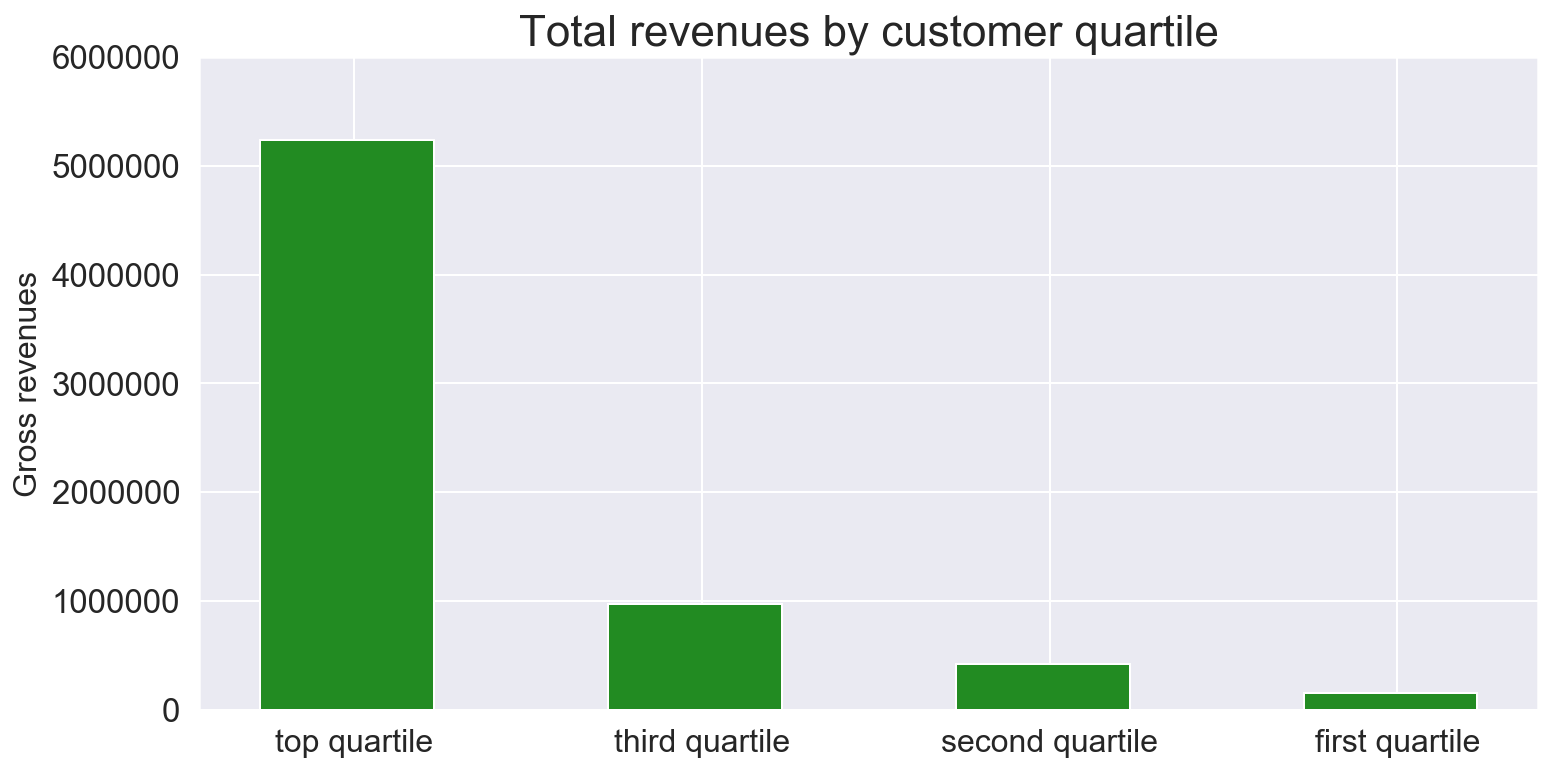

In [96]:
labels = ['top quartile', 'third quartile', 'second quartile', 'first quartile']
rev_by_quartile = [5236358, 6208721-5236358, 6630596-6208721, 6784503-6630596]

x = np.arange(len(labels))  # the label locations
width = 0.5

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/25, rev_by_quartile, width, color='forestgreen')

ax.set_ylabel('Gross revenues', fontsize=16)
ax.set_ylim(0, 6_000_000)
ax.set_title('Total revenues by customer quartile', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

# Aggregating data to daily frequency

In [97]:
# Setting a DateTime index for DF
df = df.set_index('DateTime')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361851 entries, 2010-12-01 08:26:00 to 2011-12-09 12:49:00
Data columns (total 11 columns):
InvoiceNo       361851 non-null object
StockCode       361851 non-null object
Description     361851 non-null object
Quantity        361851 non-null int64
UnitPrice       361851 non-null float64
CustomerID      361851 non-null float64
gross           361851 non-null float64
time            361851 non-null object
date            361851 non-null object
product_code    361851 non-null object
top_products    361851 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 33.1+ MB


In [99]:
id_grouping = df.groupby(['date', 'CustomerID']).agg({'InvoiceNo': 'nunique', 'StockCode': 'count', 'Quantity': 'sum',
                                        'UnitPrice': 'mean', 'gross': 'sum', 'top_products': 'mean'}).reset_index()

In [100]:
id_grouping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 8 columns):
date            17305 non-null object
CustomerID      17305 non-null float64
InvoiceNo       17305 non-null int64
StockCode       17305 non-null int64
Quantity        17305 non-null int64
UnitPrice       17305 non-null float64
gross           17305 non-null float64
top_products    17305 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [101]:
id_grouping.CustomerID.nunique()

3947

In [102]:
df.CustomerID.nunique()

3947

In [103]:
id_grouping.date.nunique()

305

In [104]:
id_grouping.describe()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,gross,top_products
count,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000
mean,15489.684484,1.146374,20.910199,231.640335,4.830770,391.918290,0.663427
std,1613.941079,0.501053,26.198038,503.859136,32.676473,1015.710771,0.269934
min,12747.000000,1.000000,1.000000,-9360.000000,0.000000,-7460.950000,0.000000
25%,14096.000000,1.000000,5.000000,53.000000,1.999000,121.260000,0.500000
50%,15465.000000,1.000000,14.000000,136.000000,2.816275,272.360000,0.682540
75%,16885.000000,1.000000,27.000000,266.000000,3.970000,427.400000,0.882353
max,18287.000000,24.000000,543.000000,25930.000000,2500.000000,71601.440000,1.000000


In [105]:
df.describe()

,Quantity,UnitPrice,CustomerID,gross,top_products
count,361851.000000,361851.000000,361851.000000,361851.000000,361851.000000
mean,11.077864,3.036690,15547.861802,18.742925,0.611094
std,49.315809,12.776352,1594.428174,69.499842,0.487503
min,-9360.000000,0.000000,12747.000000,-3825.360000,0.000000
25%,2.000000,1.250000,14194.000000,3.750000,0.000000
50%,4.000000,1.950000,15514.000000,10.200000,1.000000
75%,12.000000,3.750000,16931.000000,17.700000,1.000000
max,12540.000000,3060.600000,18287.000000,7144.720000,1.000000


The result of aggregating the intraday data into daily data is 17,305 rows of 3,947 customers. There are 305 days in the dataset, which implies 56.7 product purchases by 12.9 customers per day on average. Given the mean "gross" intraday is 18.74 and 391.92 daily, that would suggest 20.91 product purchases per day. This is confirmed by the mean "Quantity" intraday value of 11.08 and 231.64 daily, implying 20.61 product purchases per day. 

Moroever, the daily grouped data has mean "StockCode" of 20.91, which directly records the number of product purchases per day, confirming the above figures. So the arithmetic suggests that the aggregation from intraday to daily was accomplished successfully.

In [106]:
df_daily = pd.DataFrame(id_grouping)

In [107]:
df_daily.columns

Index(['date', 'CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice',
       'gross', 'top_products'],
      dtype='object')

In [108]:
# Renaming the DF columns
df_daily.columns = ['date', 'id', 'invoices_no', 'categories', 'quantity', 'unitprice', 'gross', 'top_products']

In [109]:
df_daily.head(5)

,date,id,invoices_no,categories,quantity,unitprice,gross,top_products
0,2010-12-01,12748.0,1,1,1,4.950000,4.95,1.000000
1,2010-12-01,12838.0,1,59,228,1.973390,390.79,0.576271
2,2010-12-01,12868.0,1,12,112,3.170833,203.30,0.833333
3,2010-12-01,12921.0,1,15,140,2.483333,322.40,0.933333
4,2010-12-01,12947.0,1,17,184,2.960588,304.04,0.470588


In [110]:
# The data is listed according to INDIVIDUAL customers, distinguished by "id"
# "invoices_no" indicate number of intraday transactions (with a single invoice) that day
# "categories" indicate how many product categories were purchased that day
# "quantity" is the number of individual items purchased that day
# "unitprice" is the average price of the individual items purchased that day
# "gross" is the total spending on that day
# "top_products" is the proportion of top 20% products purchased that day

In [111]:
df_daily.describe()

,id,invoices_no,categories,quantity,unitprice,gross,top_products
count,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000
mean,15489.684484,1.146374,20.910199,231.640335,4.830770,391.918290,0.663427
std,1613.941079,0.501053,26.198038,503.859136,32.676473,1015.710771,0.269934
min,12747.000000,1.000000,1.000000,-9360.000000,0.000000,-7460.950000,0.000000
25%,14096.000000,1.000000,5.000000,53.000000,1.999000,121.260000,0.500000
50%,15465.000000,1.000000,14.000000,136.000000,2.816275,272.360000,0.682540
75%,16885.000000,1.000000,27.000000,266.000000,3.970000,427.400000,0.882353
max,18287.000000,24.000000,543.000000,25930.000000,2500.000000,71601.440000,1.000000


In [112]:
#df_daily.to_csv(r'C:\\Users\\Tan\\Desktop\\GA\\Capstone\\know_customer_daily_data.csv', index=False)